In [1]:
from model import BeatCNN
from audio import analyze
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import pickle as pkl
import json
from scipy import signal
import numpy as np

In [2]:
path = "./test_songs/Helblinde - Love is War.ogg" # Put here the path to your file

In [3]:
# Computing the predictions
model = BeatCNN()
audio = analyze(path)
model.load("./weights/600_16.wgh")
pred = model(audio).numpy().astype('float64')[:, 0]

In [4]:
# Computing the periodogram and finding peaks
f, Pxx = signal.periodogram(pred)
f = 5172*f  # Converting frequencies to BPMs
pks = signal.find_peaks(Pxx)[0]
pks = [f[pks] for pks in sorted(pks, key=lambda x: Pxx[x], reverse=True)
       if 50 <= f[pks] <= 500]
bpm = pks[0]
while not int(bpm) <= 200:  # Converting the BPM to a range between 100 and 200
    bpm /= 2
print(f"Predicted BPM: {int(bpm)}")

Predicted BPM: 200


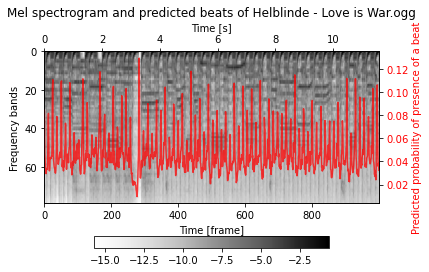

In [5]:
# Plotting the spectrogram and predictions
f2, ax2 = plt.subplots()
spec = ax2.imshow(audio[4000:5000, :, 1].T, cmap="Greys", aspect='auto')
ax2.set_title(f"Mel spectrogram and predicted beats of {path.split('/')[-1]}")
ax2.set_ylim(79, 0)
ax2.set_xlabel('Time [frame]')
ax2.set_ylabel('Frequency bands')
cb = f2.colorbar(spec, orientation='horizontal', shrink=.7)

secax = ax2.secondary_xaxis('top',
                            functions=(lambda x: 11.6e-3*x,
                                       lambda x: 11.6e-3*x))
secax.set_xlabel('Time [s]')

ax3 = ax2.twinx()
ax3.plot(pred[4000:5000], color='red', alpha=0.75)
ax3.set_ylabel('Predicted probability of presence of a beat',
               color='red')
ax3.tick_params('y', labelcolor='red')

Text(0.5, 0, 'BPMs')

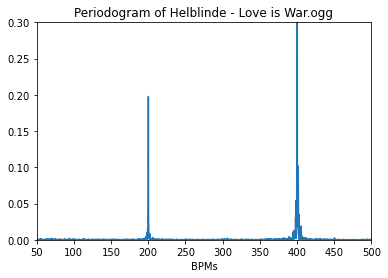

In [6]:
# Plotting the periodogram
f1, ax1 = plt.subplots()
ax1.plot(f, Pxx)
ax1.set_xlim(50, 500)
ax1.set_ylim(0, .3)
ax1.set_title(f"Periodogram of {path.split('/')[-1]}")
ax1.set_xlabel("BPMs")